In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
plt.style.use('ggplot')

## Context

Transparent Classroom is a software for Montessori schools, classrooms, and teachers. Transparent Classroom is interested in seeing the different "adoption stories" of the program into classrooms.

Classrooms are assigned a number of hearts, based on quantity, frequency, and consistency of posts to the program.

What TP would like to know is how does a classroom get to five hearts? What are the different patterns? They would also like to know the characteristics of the schools/classrooms that fall into these patterns.

In [23]:
## Load the datasets

health_checks_df = pd.read_csv('health_checks.csv', parse_dates=[2])
classrooms_df = pd.read_csv('classrooms.csv', parse_dates=[2], names=['classroom_id', 'school_id', 'created_at', 'classroom_type'], header=0)
schools_df = pd.read_csv('schools.csv', parse_dates=[2], names=['school_id', 'state', 'paying_start_date'], header=0)

In [4]:
health_checks_df.head()

school_id  classroom_id       date  score record_keeping_quantity_1  \
0         58           133 2017-03-14      0                         f   
1        392          1201 2017-03-14      3                         t   
2        463          1427 2017-03-14      0                         f   
3        463          1431 2017-03-14      0                         f   
4         52           116 2017-03-14      3                         t   

  record_keeping_quantity_2 record_keeping_frequency_1  \
0                         f                          f   
1                         f                          t   
2                         f                          f   
3                         f                          f   
4                         f                          t   

  record_keeping_frequency_2 record_keeping_usage record_keeping_observations  \
0                          f                    f                           f   
1                          f                    f                           f   
2                          f                    f                           f   
3                          f                    f                           f   
4                          f                    f                           f   

  record_keeping_consistency  
0                          f  
1                          t  
2                          f  
3                          f  
4                          t

In [21]:
classrooms_df.head()

classroom_id  school_id                 created_at    classroom_type
0           174         48 2015-08-25 22:49:23.630857           Primary
1          2645        862 2017-08-03 21:21:57.238632  Lower Elementary
2          3675       1099 2018-02-09 04:47:46.599757            Infant
3          3182        968 2017-09-29 21:14:21.740455           Primary
4          1436        443 2016-12-01 00:15:31.334513           Primary

In [24]:
schools_df.head()

school_id   state paying_start_date
0       1074  Paying        2018-03-01
1        106  Paying        2016-04-01
2        285  Paying        2017-01-26
3        866  Paying        2017-10-02
4        802  Paying        2017-11-01

In [8]:
## Doing some data engineering 
classrooms_df['start_date'] = pd.to_datetime(classrooms_df['created_at'].dt.date)
classrooms_final = classrooms_df.drop(['created_at'], axis=1)

In [9]:
classrooms_final.head()

classroom_id  school_id    classroom_type start_date
0           174         48           Primary 2015-08-25
1          2645        862  Lower Elementary 2017-08-03
2          3675       1099            Infant 2018-02-09
3          3182        968           Primary 2017-09-29
4          1436        443           Primary 2016-12-01

I'll merge health_checks with classrooms_df and create a new variable days_elapsed which is date - created_at

In [10]:
hearts_classrooms_df = health_checks_df.merge(classrooms_final, on=['classroom_id', 'school_id'])

In [11]:
hearts_classrooms_df.head()

school_id  classroom_id       date  score record_keeping_quantity_1  \
0         58           133 2017-03-14      0                         f   
1         58           133 2017-03-15      0                         f   
2         58           133 2017-03-16      0                         f   
3         58           133 2017-03-17      0                         f   
4         58           133 2017-03-18      0                         f   

  record_keeping_quantity_2 record_keeping_frequency_1  \
0                         f                          f   
1                         f                          f   
2                         f                          f   
3                         f                          f   
4                         f                          f   

  record_keeping_frequency_2 record_keeping_usage record_keeping_observations  \
0                          f                    f                           f   
1                          f                    f                           f   
2                          f                    f                           f   
3                          f                    f                           f   
4                          f                    f                           f   

  record_keeping_consistency    classroom_type start_date  
0                          f  Upper Elementary 2015-08-12  
1                          f  Upper Elementary 2015-08-12  
2                          f  Upper Elementary 2015-08-12  
3                          f  Upper Elementary 2015-08-12  
4                          f  Upper Elementary 2015-08-12

In [17]:
hearts_classrooms_df['time_delta'] = hearts_classrooms_df['date'] - hearts_classrooms_df['start_date']
hearts_classrooms_df['days_elapsed'] = hearts_classrooms_df['time_delta'].astype('timedelta64[D]')

hearts_classrooms_df.head()

school_id  classroom_id       date  score record_keeping_quantity_1  \
0         58           133 2017-03-14      0                         f   
1         58           133 2017-03-15      0                         f   
2         58           133 2017-03-16      0                         f   
3         58           133 2017-03-17      0                         f   
4         58           133 2017-03-18      0                         f   

  record_keeping_quantity_2 record_keeping_frequency_1  \
0                         f                          f   
1                         f                          f   
2                         f                          f   
3                         f                          f   
4                         f                          f   

  record_keeping_frequency_2 record_keeping_usage record_keeping_observations  \
0                          f                    f                           f   
1                          f                    f                           f   
2                          f                    f                           f   
3                          f                    f                           f   
4                          f                    f                           f   

  record_keeping_consistency    classroom_type start_date time_delta  \
0                          f  Upper Elementary 2015-08-12   580 days   
1                          f  Upper Elementary 2015-08-12   581 days   
2                          f  Upper Elementary 2015-08-12   582 days   
3                          f  Upper Elementary 2015-08-12   583 days   
4                          f  Upper Elementary 2015-08-12   584 days   

   days_elapsed  
0         580.0  
1         581.0  
2         582.0  
3         583.0  
4         584.0

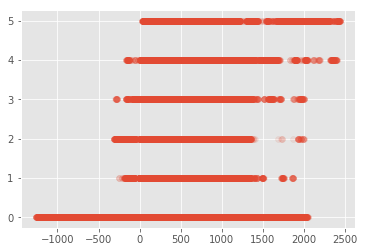

In [18]:
plt.scatter(hearts_classrooms_df['days_elapsed'], hearts_classrooms_df['score'], alpha=0.1)

Health checks are run every single day

There are 524 classrooms that have negative days elapsed. The reason for this bug is that health checks begin when the SCHOOL is created, not when the classroom is created. See data exploration below.

In [32]:
len(hearts_classrooms_df.loc[hearts_classrooms_df['days_elapsed']<0,'classroom_id'].unique())

524

In [38]:
hcs_df = hearts_classrooms_df.merge(schools_df, on=['school_id'])

In [39]:
hcs_df.head()

school_id  classroom_id       date  score record_keeping_quantity_1  \
0         58           133 2017-03-14      0                         f   
1         58           133 2017-03-15      0                         f   
2         58           133 2017-03-16      0                         f   
3         58           133 2017-03-17      0                         f   
4         58           133 2017-03-18      0                         f   

  record_keeping_quantity_2 record_keeping_frequency_1  \
0                         f                          f   
1                         f                          f   
2                         f                          f   
3                         f                          f   
4                         f                          f   

  record_keeping_frequency_2 record_keeping_usage record_keeping_observations  \
0                          f                    f                           f   
1                          f                    f                           f   
2                          f                    f                           f   
3                          f                    f                           f   
4                          f                    f                           f   

  record_keeping_consistency    classroom_type start_date time_delta  \
0                          f  Upper Elementary 2015-08-12   580 days   
1                          f  Upper Elementary 2015-08-12   581 days   
2                          f  Upper Elementary 2015-08-12   582 days   
3                          f  Upper Elementary 2015-08-12   583 days   
4                          f  Upper Elementary 2015-08-12   584 days   

   days_elapsed    state paying_start_date  
0         580.0  Blocked        2016-09-02  
1         581.0  Blocked        2016-09-02  
2         582.0  Blocked        2016-09-02  
3         583.0  Blocked        2016-09-02  
4         584.0  Blocked        2016-09-02

In [40]:
# classroom_id 594 is a classroom that has negative elapsed days

hcs_df.loc[hcs_df['classroom_id']==594, :].sort_values(by='date').head(1)

# paying_start_date (from schools_df) is the same as the first date from health_checks_df


school_id  classroom_id       date  score record_keeping_quantity_1  \
7075         52           594 2015-10-16      0                         f   

     record_keeping_quantity_2 record_keeping_frequency_1  \
7075                         f                          f   

     record_keeping_frequency_2 record_keeping_usage  \
7075                          f                    f   

     record_keeping_observations record_keeping_consistency classroom_type  \
7075                           f                          f     Elementary   

     start_date time_delta  days_elapsed   state paying_start_date  
7075 2016-06-14  -242 days        -242.0  Paying        2015-10-16

In light of this, I'm just going to remove rows that have negative elapsed days as we are looking at the classroom level. If we expand to the school level, I'll revisit this decision.  

In [45]:
hcs_final = hcs_df.drop(hcs_df.loc[hcs_df['days_elapsed']<=0,'classroom_id'].index, axis=0)

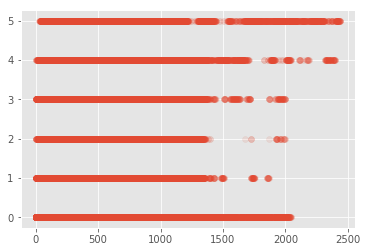

In [46]:
plt.scatter(hcs_final['days_elapsed'], hcs_final['score'], alpha=0.1)

Now I'm looking at individual "adoption" stories to see how classrooms' hearts progressed over time

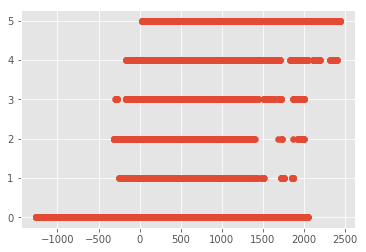

In [72]:
fig, ax = plt.subplots()

colors = {'D':'red', 'E':'blue', 'F':'green', 'G':'black'}

grouped = health_check_classrooms_df.groupby('classroom_id')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='carat', y='price', label=key, color=colors[key])

plt.show()

/home/christie/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


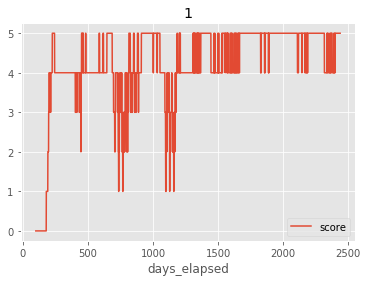

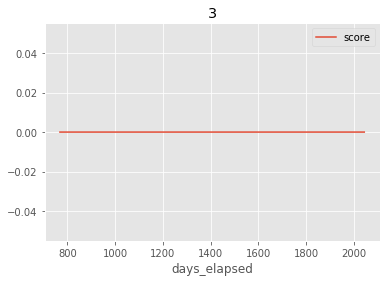

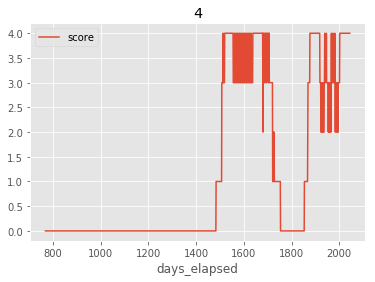

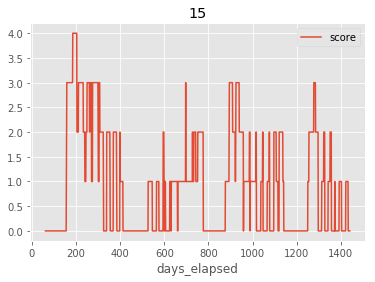

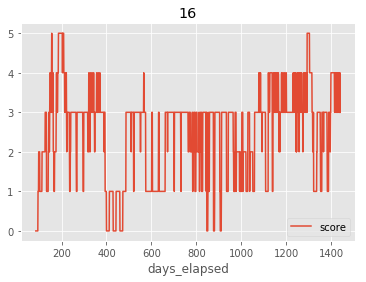

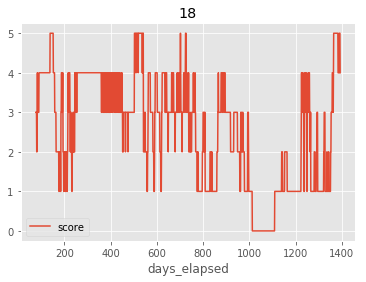

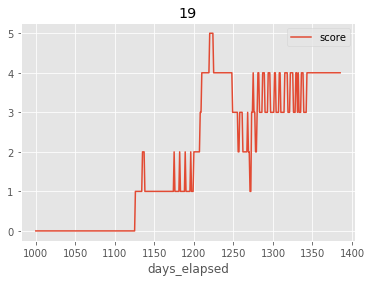

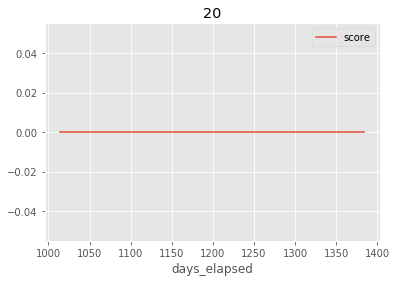

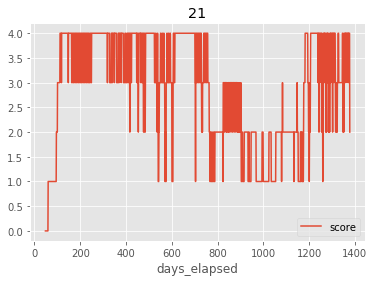

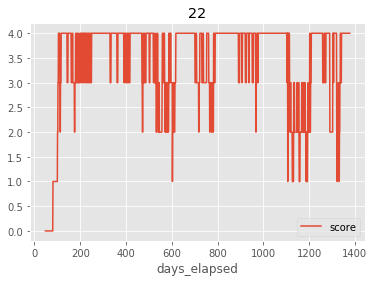

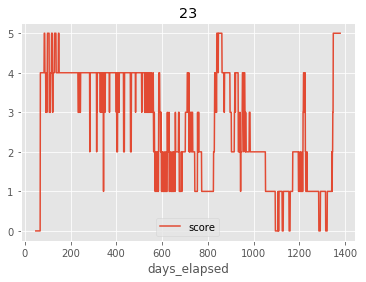

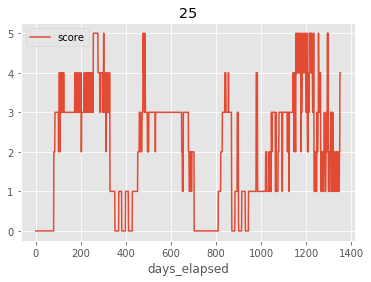

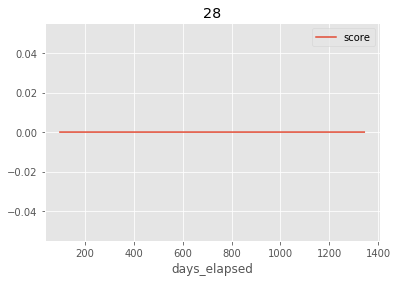

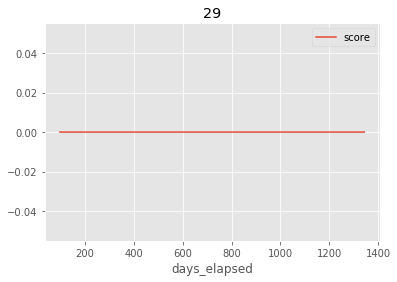

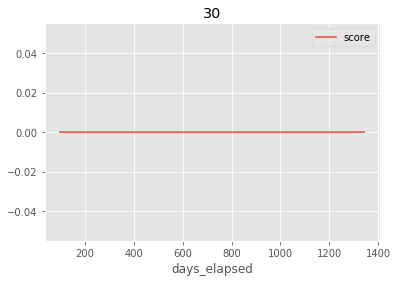

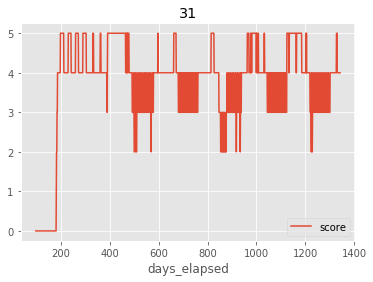

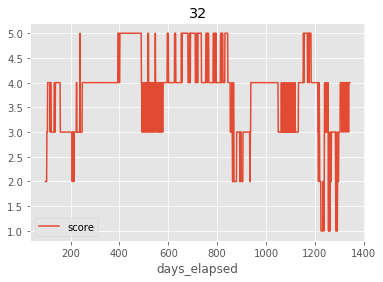

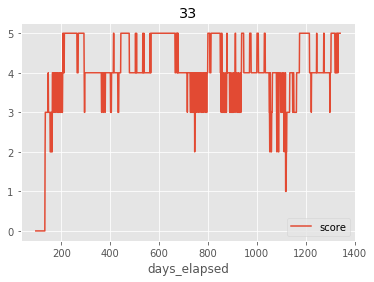

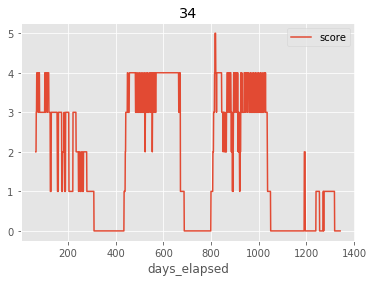

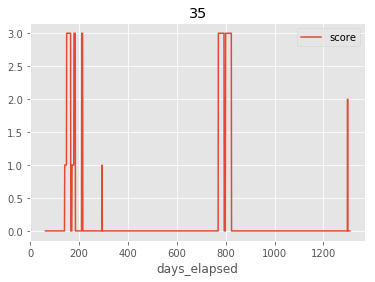

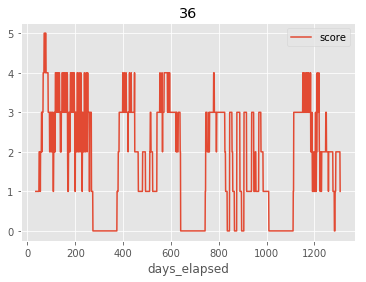

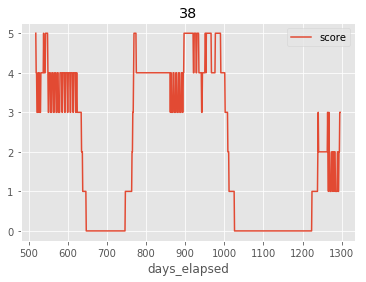

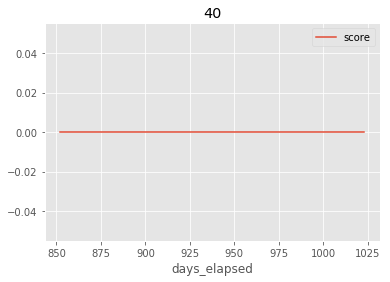

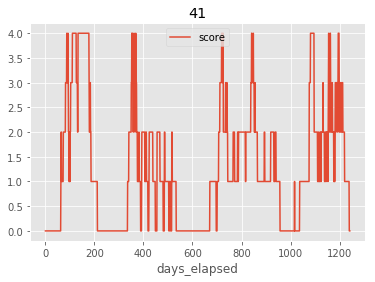

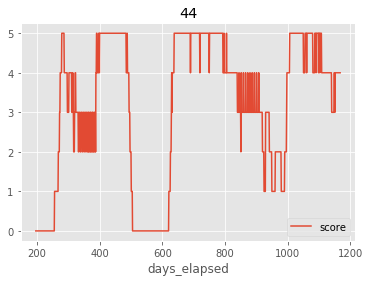

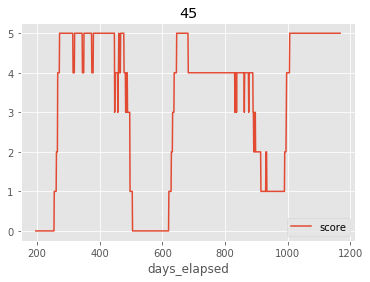

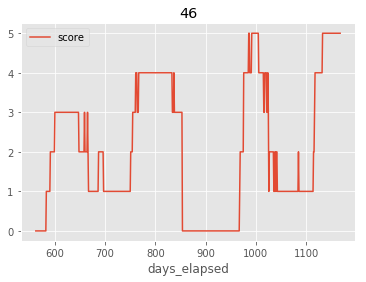

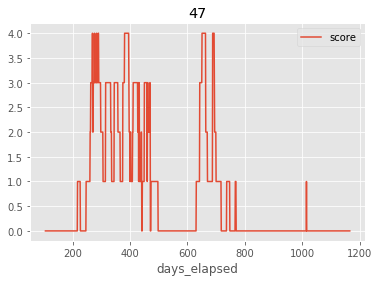

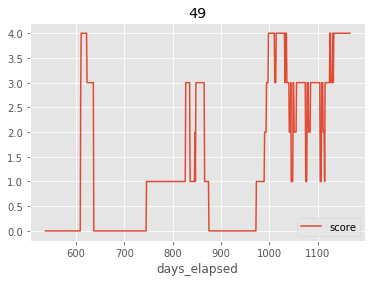

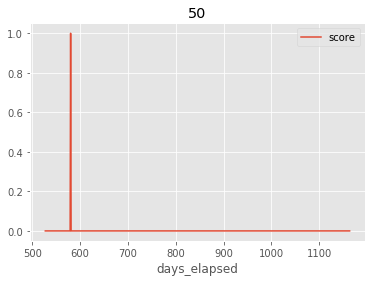

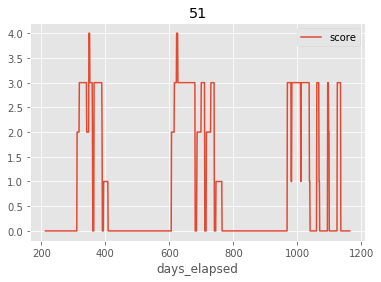

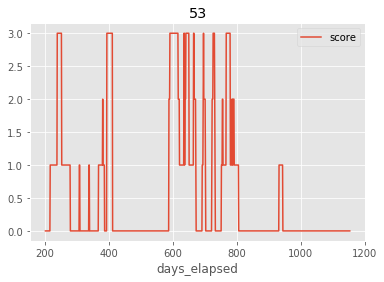

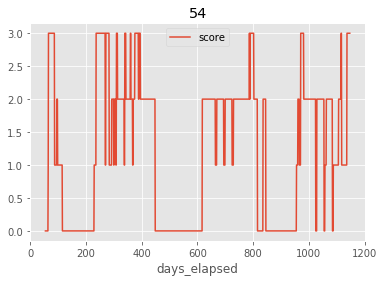

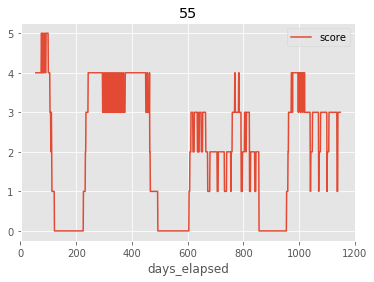

In [47]:
for i in range(1,56):
    if hcs_final[hcs_final['classroom_id']==i].size != 0:
        hcs_final[hcs_final['classroom_id']==i].sort_values(by='days_elapsed').plot('days_elapsed', 'score', title=i)

Now I'll look at adoption stories at the classroom level.

In [48]:
## misc code

In [82]:
len(health_check_classrooms_df['school_id'].unique())

734

In [76]:
grouped = health_check_classrooms_df.groupby('classroom_id')
for key, group in grouped:
    print(key, group.head())
    

1         school_id  classroom_id       date  score record_keeping_quantity_1  \
178861          2             1 2017-03-14      5                         t   
178862          2             1 2017-03-15      5                         t   
178863          2             1 2017-03-16      5                         t   
178864          2             1 2017-03-17      5                         t   
178865          2             1 2017-03-18      5                         t   

       record_keeping_quantity_2 record_keeping_frequency_1  \
178861                         t                          t   
178862                         t                          t   
178863                         t                          t   
178864                         t                          t   
178865                         t                          t   

       record_keeping_frequency_2 record_keeping_usage  \
178861                          t                    f   
178862                      

191805  Lower Elementary 2015-03-11         738.0   738 days  
58         school_id  classroom_id       date  score record_keeping_quantity_1  \
629294         25            58 2017-03-14      2                         t   
629295         25            58 2017-03-15      2                         t   
629296         25            58 2017-03-16      2                         t   
629297         25            58 2017-03-17      2                         t   
629298         25            58 2017-03-18      0                         f   

       record_keeping_quantity_2 record_keeping_frequency_1  \
629294                         f                          t   
629295                         f                          t   
629296                         f                          t   
629297                         f                          t   
629298                         f                          f   

       record_keeping_frequency_2 record_keeping_usage  \
629294                

214746 2015-07-18         609.0   609 days  
110         school_id  classroom_id       date  score record_keeping_quantity_1  \
212628         42           110 2017-03-14      3                         t   
212629         42           110 2017-03-15      3                         t   
212630         42           110 2017-03-16      3                         t   
212631         42           110 2017-03-17      3                         t   
212632         42           110 2017-03-18      2                         t   

       record_keeping_quantity_2 record_keeping_frequency_1  \
212628                         f                          t   
212629                         f                          t   
212630                         f                          t   
212631                         f                          t   
212632                         f                          t   

       record_keeping_frequency_2 record_keeping_usage  \
212628                          f      

152         school_id  classroom_id       date  score record_keeping_quantity_1  \
200794         61           152 2017-03-14      0                         f   
200795         61           152 2017-03-15      0                         f   
200796         61           152 2017-03-16      0                         f   
200797         61           152 2017-03-17      0                         f   
200798         61           152 2017-03-18      0                         f   

       record_keeping_quantity_2 record_keeping_frequency_1  \
200794                         f                          f   
200795                         f                          f   
200796                         f                          f   
200797                         f                          f   
200798                         f                          f   

       record_keeping_frequency_2 record_keeping_usage  \
200794                          f                    f   
200795                    

313008  Lower Elementary 2015-08-31         565.0   565 days  
196         school_id  classroom_id       date  score record_keeping_quantity_1  \
313915         70           196 2017-03-14      3                         t   
313916         70           196 2017-03-15      3                         t   
313917         70           196 2017-03-16      3                         t   
313918         70           196 2017-03-17      3                         t   
313919         70           196 2017-03-18      3                         t   

       record_keeping_quantity_2 record_keeping_frequency_1  \
313915                         f                          t   
313916                         f                          t   
313917                         f                          t   
313918                         f                          t   
313919                         f                          t   

       record_keeping_frequency_2 record_keeping_usage  \
313915               

37857 2015-10-21         514.0   514 days  
283        school_id  classroom_id       date  score record_keeping_quantity_1  \
38736         59           283 2017-03-14      0                         f   
38737         59           283 2017-03-15      0                         f   
38738         59           283 2017-03-16      0                         f   
38739         59           283 2017-03-17      0                         f   
38740         59           283 2017-03-18      0                         f   

      record_keeping_quantity_2 record_keeping_frequency_1  \
38736                         f                          f   
38737                         f                          f   
38738                         f                          f   
38739                         f                          f   
38740                         f                          f   

      record_keeping_frequency_2 record_keeping_usage  \
38736                          f                    f

35667 2016-01-26         417.0   417 days  
328        school_id  classroom_id       date  score record_keeping_quantity_1  \
36393        102           328 2017-03-14      0                         f   
36394        102           328 2017-03-15      0                         f   
36395        102           328 2017-03-16      0                         f   
36396        102           328 2017-03-17      0                         f   
36397        102           328 2017-03-18      0                         f   

      record_keeping_quantity_2 record_keeping_frequency_1  \
36393                         f                          f   
36394                         f                          f   
36395                         f                          f   
36396                         f                          f   
36397                         f                          f   

      record_keeping_frequency_2 record_keeping_usage  \
36393                          f                    f

120382 2016-03-21         362.0   362 days  
394         school_id  classroom_id       date  score record_keeping_quantity_1  \
483621        158           394 2017-03-14      0                         f   
483622        158           394 2017-03-15      0                         f   
483623        158           394 2017-03-16      0                         f   
483624        158           394 2017-03-17      0                         f   
483625        158           394 2017-03-18      0                         f   

       record_keeping_quantity_2 record_keeping_frequency_1  \
483621                         f                          f   
483622                         f                          f   
483623                         f                          f   
483624                         f                          f   
483625                         f                          f   

       record_keeping_frequency_2 record_keeping_usage  \
483621                          f      

524262  Lower Elementary 2016-05-02         320.0   320 days  
457         school_id  classroom_id       date  score record_keeping_quantity_1  \
523650        160           457 2017-03-14      0                         f   
523651        160           457 2017-03-15      0                         f   
523652        160           457 2017-03-16      0                         f   
523653        160           457 2017-03-17      0                         f   
523654        160           457 2017-03-18      0                         f   

       record_keeping_quantity_2 record_keeping_frequency_1  \
523650                         f                          f   
523651                         f                          f   
523652                         f                          f   
523653                         f                          f   
523654                         f                          f   

       record_keeping_frequency_2 record_keeping_usage  \
523650               

605917 2016-05-16         306.0   306 days  
516         school_id  classroom_id       date  score record_keeping_quantity_1  \
658918        225           516 2017-03-15      2                         t   
658919        225           516 2017-03-16      2                         t   
658920        225           516 2017-03-17      2                         t   
658921        225           516 2017-03-18      3                         t   
658922        225           516 2017-03-19      3                         t   

       record_keeping_quantity_2 record_keeping_frequency_1  \
658918                         f                          t   
658919                         f                          t   
658920                         f                          t   
658921                         f                          t   
658922                         f                          t   

       record_keeping_frequency_2 record_keeping_usage  \
658918                          f      

577791 2016-05-27         295.0   295 days  
565         school_id  classroom_id       date  score record_keeping_quantity_1  \
590195        223           565 2017-03-14      0                         f   
590196        223           565 2017-03-15      0                         f   
590197        223           565 2017-03-16      0                         f   
590198        223           565 2017-03-17      0                         f   
590199        223           565 2017-03-18      0                         f   

       record_keeping_quantity_2 record_keeping_frequency_1  \
590195                         f                          f   
590196                         f                          f   
590197                         f                          f   
590198                         f                          f   
590199                         f                          f   

       record_keeping_frequency_2 record_keeping_usage  \
590195                          f      

318474 2016-06-20         271.0   271 days  
606         school_id  classroom_id       date  score record_keeping_quantity_1  \
270833         86           606 2017-03-14      2                         f   
270834         86           606 2017-03-15      2                         f   
270835         86           606 2017-03-16      2                         f   
270836         86           606 2017-03-17      2                         f   
270837         86           606 2017-03-18      2                         f   

       record_keeping_quantity_2 record_keeping_frequency_1  \
270833                         f                          t   
270834                         f                          t   
270835                         f                          t   
270836                         f                          t   
270837                         f                          t   

       record_keeping_frequency_2 record_keeping_usage  \
270833                          f      

601068 2016-07-02         259.0   259 days  
644         school_id  classroom_id       date  score record_keeping_quantity_1  \
327065        226           644 2017-03-14      0                         f   
327066        226           644 2017-03-15      0                         f   
327067        226           644 2017-03-16      0                         f   
327068        226           644 2017-03-17      0                         f   
327069        226           644 2017-03-18      0                         f   

       record_keeping_quantity_2 record_keeping_frequency_1  \
327065                         f                          f   
327066                         f                          f   
327067                         f                          f   
327068                         f                          f   
327069                         f                          f   

       record_keeping_frequency_2 record_keeping_usage  \
327065                          f      

368187 2016-07-19         242.0   242 days  
684         school_id  classroom_id       date  score record_keeping_quantity_1  \
368821        267           684 2017-03-14      1                         f   
368822        267           684 2017-03-15      1                         f   
368823        267           684 2017-03-16      1                         f   
368824        267           684 2017-03-17      1                         f   
368825        267           684 2017-03-18      1                         f   

       record_keeping_quantity_2 record_keeping_frequency_1  \
368821                         f                          t   
368822                         f                          t   
368823                         f                          t   
368824                         f                          t   
368825                         f                          t   

       record_keeping_frequency_2 record_keeping_usage  \
368821                          f      

511977  Lower Elementary 2016-07-22         239.0   239 days  
731         school_id  classroom_id       date  score record_keeping_quantity_1  \
601671        249           731 2017-03-14      3                         t   
601672        249           731 2017-03-15      4                         t   
601673        249           731 2017-03-16      3                         t   
601674        249           731 2017-03-17      3                         t   
601675        249           731 2017-03-18      3                         t   

       record_keeping_quantity_2 record_keeping_frequency_1  \
601671                         f                          t   
601672                         f                          t   
601673                         f                          t   
601674                         f                          t   
601675                         f                          t   

       record_keeping_frequency_2 record_keeping_usage  \
601671               

805967  Lower Elementary 2016-08-03         227.0   227 days  
777         school_id  classroom_id       date  score record_keeping_quantity_1  \
808048         79           777 2017-03-14      0                         f   
808049         79           777 2017-03-15      0                         f   
808050         79           777 2017-03-16      0                         f   
808051         79           777 2017-03-17      0                         f   
808052         79           777 2017-03-18      0                         f   

       record_keeping_quantity_2 record_keeping_frequency_1  \
808048                         f                          f   
808049                         f                          f   
808050                         f                          f   
808051                         f                          f   
808052                         f                          f   

       record_keeping_frequency_2 record_keeping_usage  \
808048               

536581 2016-08-11         219.0   219 days  
827         school_id  classroom_id       date  score record_keeping_quantity_1  \
537312        324           827 2017-03-14      1                         f   
537313        324           827 2017-03-15      1                         f   
537314        324           827 2017-03-16      1                         f   
537315        324           827 2017-03-17      1                         f   
537316        324           827 2017-03-18      1                         f   

       record_keeping_quantity_2 record_keeping_frequency_1  \
537312                         f                          t   
537313                         f                          t   
537314                         f                          t   
537315                         f                          t   
537316                         f                          t   

       record_keeping_frequency_2 record_keeping_usage  \
537312                          f      

872         school_id  classroom_id       date  score record_keeping_quantity_1  \
735589        125           872 2017-03-14      0                         f   
735590        125           872 2017-03-15      0                         f   
735591        125           872 2017-03-16      0                         f   
735592        125           872 2017-03-17      0                         f   
735593        125           872 2017-03-18      0                         f   

       record_keeping_quantity_2 record_keeping_frequency_1  \
735589                         f                          f   
735590                         f                          f   
735591                         f                          f   
735592                         f                          f   
735593                         f                          f   

       record_keeping_frequency_2 record_keeping_usage  \
735589                          f                    f   
735590                    

741511 2016-08-18         212.0   212 days  
909         school_id  classroom_id       date  score record_keeping_quantity_1  \
742118        304           909 2017-03-14      3                         t   
742119        304           909 2017-03-15      3                         t   
742120        304           909 2017-03-16      3                         t   
742121        304           909 2017-03-17      3                         t   
742122        304           909 2017-03-18      3                         t   

       record_keeping_quantity_2 record_keeping_frequency_1  \
742118                         f                          t   
742119                         f                          t   
742120                         f                          t   
742121                         f                          t   
742122                         f                          t   

       record_keeping_frequency_2 record_keeping_usage  \
742118                          f      

529126 2016-08-26         204.0   204 days  
953         school_id  classroom_id       date  score record_keeping_quantity_1  \
532588        364           953 2017-03-14      3                         t   
532589        364           953 2017-03-15      3                         t   
532590        364           953 2017-03-16      3                         t   
532591        364           953 2017-03-17      3                         t   
532592        364           953 2017-03-18      3                         t   

       record_keeping_quantity_2 record_keeping_frequency_1  \
532588                         f                          t   
532589                         f                          t   
532590                         f                          t   
532591                         f                          t   
532592                         f                          t   

       record_keeping_frequency_2 record_keeping_usage  \
532588                          f      

731927 2016-08-29         201.0   201 days  
992         school_id  classroom_id       date  score record_keeping_quantity_1  \
732534        125           992 2017-03-14      0                         f   
732535        125           992 2017-03-15      0                         f   
732536        125           992 2017-03-16      0                         f   
732537        125           992 2017-03-17      0                         f   
732538        125           992 2017-03-18      0                         f   

       record_keeping_quantity_2 record_keeping_frequency_1  \
732534                         f                          f   
732535                         f                          f   
732536                         f                          f   
732537                         f                          f   
732538                         f                          f   

       record_keeping_frequency_2 record_keeping_usage  \
732534                          f      

765616 2016-08-29         201.0   201 days  
1031         school_id  classroom_id       date  score record_keeping_quantity_1  \
766223        334          1031 2017-03-14      0                         f   
766224        334          1031 2017-03-15      0                         f   
766225        334          1031 2017-03-16      0                         f   
766226        334          1031 2017-03-17      0                         f   
766227        334          1031 2017-03-18      0                         f   

       record_keeping_quantity_2 record_keeping_frequency_1  \
766223                         f                          f   
766224                         f                          f   
766225                         f                          f   
766226                         f                          f   
766227                         f                          f   

       record_keeping_frequency_2 record_keeping_usage  \
766223                          f     

786134  Lower Elementary 2016-08-29         201.0   201 days  
1071         school_id  classroom_id       date  score record_keeping_quantity_1  \
792851        371          1071 2017-03-14      0                         f   
792852        371          1071 2017-03-15      0                         f   
792853        371          1071 2017-03-16      0                         f   
792854        371          1071 2017-03-17      0                         f   
792855        371          1071 2017-03-18      0                         f   

       record_keeping_quantity_2 record_keeping_frequency_1  \
792851                         f                          f   
792852                         f                          f   
792853                         f                          f   
792854                         f                          f   
792855                         f                          f   

       record_keeping_frequency_2 record_keeping_usage  \
792851              

820300 2016-08-29         201.0   201 days  
1110         school_id  classroom_id       date  score record_keeping_quantity_1  \
821096         64          1110 2017-03-14      0                         f   
821097         64          1110 2017-03-15      0                         f   
821098         64          1110 2017-03-16      0                         f   
821099         64          1110 2017-03-17      0                         f   
821100         64          1110 2017-03-18      0                         f   

       record_keeping_quantity_2 record_keeping_frequency_1  \
821096                         f                          f   
821097                         f                          f   
821098                         f                          f   
821099                         f                          f   
821100                         f                          f   

       record_keeping_frequency_2 record_keeping_usage  \
821096                          f     

430916 2016-09-08         191.0   191 days  
1177         school_id  classroom_id       date  score record_keeping_quantity_1  \
431429        340          1177 2017-03-14      3                         f   
431430        340          1177 2017-03-15      3                         f   
431431        340          1177 2017-03-16      3                         f   
431432        340          1177 2017-03-17      3                         f   
431433        340          1177 2017-03-18      3                         f   

       record_keeping_quantity_2 record_keeping_frequency_1  \
431429                         f                          t   
431430                         f                          t   
431431                         f                          t   
431432                         f                          t   
431433                         f                          t   

       record_keeping_frequency_2 record_keeping_usage  \
431429                          t     

568982 2016-09-20         179.0   179 days  
1227         school_id  classroom_id       date  score record_keeping_quantity_1  \
569525        396          1227 2017-03-14      2                         f   
569526        396          1227 2017-03-15      2                         f   
569527        396          1227 2017-03-16      2                         f   
569528        396          1227 2017-03-17      2                         f   
569529        396          1227 2017-03-18      2                         f   

       record_keeping_quantity_2 record_keeping_frequency_1  \
569525                         f                          t   
569526                         f                          t   
569527                         f                          t   
569528                         f                          t   
569529                         f                          t   

       record_keeping_frequency_2 record_keeping_usage  \
569525                          f     

1295         school_id  classroom_id       date  score record_keeping_quantity_1  \
591229        223          1295 2017-03-14      0                         f   
591230        223          1295 2017-03-15      0                         f   
591231        223          1295 2017-03-16      0                         f   
591232        223          1295 2017-03-17      0                         f   
591233        223          1295 2017-03-18      0                         f   

       record_keeping_quantity_2 record_keeping_frequency_1  \
591229                         f                          f   
591230                         f                          f   
591231                         f                          f   
591232                         f                          f   
591233                         f                          f   

       record_keeping_frequency_2 record_keeping_usage  \
591229                          f                    f   
591230                   

622513  Lower Elementary 2016-10-17         153.0   153 days  
1337         school_id  classroom_id       date  score record_keeping_quantity_1  \
623088        292          1337 2017-03-15      0                         f   
623089        292          1337 2017-03-16      0                         f   
623090        292          1337 2017-03-17      0                         f   
623091        292          1337 2017-03-18      0                         f   
623092        292          1337 2017-03-19      0                         f   

       record_keeping_quantity_2 record_keeping_frequency_1  \
623088                         f                          f   
623089                         f                          f   
623090                         f                          f   
623091                         f                          f   
623092                         f                          f   

       record_keeping_frequency_2 record_keeping_usage  \
623088              

515260  Lower Elementary 2016-11-06         132.0   132 days  
1382         school_id  classroom_id       date  score record_keeping_quantity_1  \
445252        431          1382 2017-03-14      5                         t   
445253        431          1382 2017-03-15      5                         t   
445254        431          1382 2017-03-16      5                         t   
445255        431          1382 2017-03-17      5                         t   
445256        431          1382 2017-03-18      5                         t   

       record_keeping_quantity_2 record_keeping_frequency_1  \
445252                         t                          t   
445253                         t                          t   
445254                         t                          t   
445255                         t                          t   
445256                         t                          t   

       record_keeping_frequency_2 record_keeping_usage  \
445252              

1422        school_id  classroom_id       date  score record_keeping_quantity_1  \
24159        462          1422 2017-03-14      0                         f   
24160        462          1422 2017-03-15      0                         f   
24161        462          1422 2017-03-16      0                         f   
24162        462          1422 2017-03-17      0                         f   
24163        462          1422 2017-03-18      0                         f   

      record_keeping_quantity_2 record_keeping_frequency_1  \
24159                         f                          f   
24160                         f                          f   
24161                         f                          f   
24162                         f                          f   
24163                         f                          f   

      record_keeping_frequency_2 record_keeping_usage  \
24159                          f                    f   
24160                          f       

925741  Lower Elementary 2017-01-06         150.0   150 days  
1485         school_id  classroom_id       date  score record_keeping_quantity_1  \
925856        479          1485 2017-06-01      0                         f   
925857        479          1485 2017-06-02      0                         f   
925858        479          1485 2017-06-03      0                         f   
925859        479          1485 2017-06-04      0                         f   
925860        479          1485 2017-06-05      0                         f   

       record_keeping_quantity_2 record_keeping_frequency_1  \
925856                         f                          f   
925857                         f                          f   
925858                         f                          f   
925859                         f                          f   
925860                         f                          f   

       record_keeping_frequency_2 record_keeping_usage  \
925856              

257892 2017-01-24          53.0    53 days  
1530         school_id  classroom_id       date  score record_keeping_quantity_1  \
258466        358          1530 2017-03-14      0                         f   
258467        358          1530 2017-03-15      0                         f   
258468        358          1530 2017-03-16      0                         f   
258469        358          1530 2017-03-17      0                         f   
258470        358          1530 2017-03-18      0                         f   

       record_keeping_quantity_2 record_keeping_frequency_1  \
258466                         f                          f   
258467                         f                          f   
258468                         f                          f   
258469                         f                          f   
258470                         f                          f   

       record_keeping_frequency_2 record_keeping_usage  \
258466                          f     

489064  Lower Elementary 2017-02-09          37.0    37 days  
1577         school_id  classroom_id       date  score record_keeping_quantity_1  \
489577        421          1577 2017-03-14      0                         f   
489578        421          1577 2017-03-15      0                         f   
489579        421          1577 2017-03-16      0                         f   
489580        421          1577 2017-03-17      0                         f   
489581        421          1577 2017-03-18      0                         f   

       record_keeping_quantity_2 record_keeping_frequency_1  \
489577                         f                          f   
489578                         f                          f   
489579                         f                          f   
489580                         f                          f   
489581                         f                          f   

       record_keeping_frequency_2 record_keeping_usage  \
489577              

425432 2017-02-21          25.0    25 days  
1617         school_id  classroom_id       date  score record_keeping_quantity_1  \
456047        506          1617 2017-03-14      0                         f   
456048        506          1617 2017-03-15      0                         f   
456049        506          1617 2017-03-16      0                         f   
456050        506          1617 2017-03-17      0                         f   
456051        506          1617 2017-03-18      0                         f   

       record_keeping_quantity_2 record_keeping_frequency_1  \
456047                         f                          f   
456048                         f                          f   
456049                         f                          f   
456050                         f                          f   
456051                         f                          f   

       record_keeping_frequency_2 record_keeping_usage  \
456047                          f     

751950 2017-02-27          19.0    19 days  
1660         school_id  classroom_id       date  score record_keeping_quantity_1  \
752372        416          1660 2017-03-14      0                         f   
752373        416          1660 2017-03-15      0                         f   
752374        416          1660 2017-03-16      0                         f   
752375        416          1660 2017-03-17      0                         f   
752376        416          1660 2017-03-18      0                         f   

       record_keeping_quantity_2 record_keeping_frequency_1  \
752372                         f                          f   
752373                         f                          f   
752374                         f                          f   
752375                         f                          f   
752376                         f                          f   

       record_keeping_frequency_2 record_keeping_usage  \
752372                          f     

233495 2017-03-07          11.0    11 days  
1701         school_id  classroom_id       date  score record_keeping_quantity_1  \
233654        481          1701 2017-03-14      0                         f   
233655        481          1701 2017-03-15      0                         f   
233656        481          1701 2017-03-16      0                         f   
233657        481          1701 2017-03-17      0                         f   
233658        481          1701 2017-03-18      0                         f   

       record_keeping_quantity_2 record_keeping_frequency_1  \
233654                         f                          f   
233655                         f                          f   
233656                         f                          f   
233657                         f                          f   
233658                         f                          f   

       record_keeping_frequency_2 record_keeping_usage  \
233654                          f     

230561 2017-03-08          10.0    10 days  
1744         school_id  classroom_id       date  score record_keeping_quantity_1  \
230720        481          1744 2017-03-14      0                         f   
230721        481          1744 2017-03-15      0                         f   
230722        481          1744 2017-03-16      0                         f   
230723        481          1744 2017-03-17      0                         f   
230724        481          1744 2017-03-18      0                         f   

       record_keeping_quantity_2 record_keeping_frequency_1  \
230720                         f                          f   
230721                         f                          f   
230722                         f                          f   
230723                         f                          f   
230724                         f                          f   

       record_keeping_frequency_2 record_keeping_usage  \
230720                          f     

239050 2017-03-08          10.0    10 days  
1786         school_id  classroom_id       date  score record_keeping_quantity_1  \
239374        481          1786 2017-03-14      0                         f   
239375        481          1786 2017-03-15      0                         f   
239376        481          1786 2017-03-16      0                         f   
239377        481          1786 2017-03-17      0                         f   
239378        481          1786 2017-03-18      0                         f   

       record_keeping_quantity_2 record_keeping_frequency_1  \
239374                         f                          f   
239375                         f                          f   
239376                         f                          f   
239377                         f                          f   
239378                         f                          f   

       record_keeping_frequency_2 record_keeping_usage  \
239374                          f     

693457 2017-03-13           5.0     5 days  
1826         school_id  classroom_id       date  score record_keeping_quantity_1  \
439937        504          1826 2017-03-14      0                         f   
439938        504          1826 2017-03-15      0                         f   
439939        504          1826 2017-03-16      0                         f   
439940        504          1826 2017-03-17      0                         f   
439941        504          1826 2017-03-18      0                         f   

       record_keeping_quantity_2 record_keeping_frequency_1  \
439937                         f                          f   
439938                         f                          f   
439939                         f                          f   
439940                         f                          f   
439941                         f                          f   

       record_keeping_frequency_2 record_keeping_usage  \
439937                          f     

839506 2017-03-28           5.0     5 days  
1870         school_id  classroom_id       date  score record_keeping_quantity_1  \
839879        549          1870 2017-03-29      0                         f   
839880        549          1870 2017-03-30      0                         f   
839881        549          1870 2017-03-31      0                         f   
839882        549          1870 2017-04-01      0                         f   
839883        549          1870 2017-04-02      0                         f   

       record_keeping_quantity_2 record_keeping_frequency_1  \
839879                         f                          f   
839880                         f                          f   
839881                         f                          f   
839882                         f                          f   
839883                         f                          f   

       record_keeping_frequency_2 record_keeping_usage  \
839879                          f     

858094 2017-04-12           4.0     4 days  
1915         school_id  classroom_id       date  score record_keeping_quantity_1  \
858469        506          1915 2017-04-12      0                         f   
858470        506          1915 2017-04-13      0                         f   
858471        506          1915 2017-04-14      0                         f   
858472        506          1915 2017-04-15      0                         f   
858473        506          1915 2017-04-16      0                         f   

       record_keeping_quantity_2 record_keeping_frequency_1  \
858469                         f                          f   
858470                         f                          f   
858471                         f                          f   
858472                         f                          f   
858473                         f                          f   

       record_keeping_frequency_2 record_keeping_usage  \
858469                          f     

873359 2017-04-24           4.0     4 days  
1988         school_id  classroom_id       date  score record_keeping_quantity_1  \
873571        741          1988 2017-04-26      0                         f   
873572        741          1988 2017-04-27      0                         f   
873573        741          1988 2017-04-28      0                         f   
873574        741          1988 2017-04-29      0                         f   
873575        741          1988 2017-04-30      0                         f   

       record_keeping_quantity_2 record_keeping_frequency_1  \
873571                         f                          f   
873572                         f                          f   
873573                         f                          f   
873574                         f                          f   
873575                         f                          f   

       record_keeping_frequency_2 record_keeping_usage  \
873571                          f     

889188 2017-05-04           4.0     4 days  
2035         school_id  classroom_id       date  score record_keeping_quantity_1  \
889544        545          2035 2017-05-04      0                         f   
889545        545          2035 2017-05-05      0                         f   
889546        545          2035 2017-05-06      0                         f   
889547        545          2035 2017-05-07      0                         f   
889548        545          2035 2017-05-08      0                         f   

       record_keeping_quantity_2 record_keeping_frequency_1  \
889544                         f                          f   
889545                         f                          f   
889546                         f                          f   
889547                         f                          f   
889548                         f                          f   

       record_keeping_frequency_2 record_keeping_usage  \
889544                          f     

899995  Lower Elementary 2017-05-18           4.0     4 days  
2127         school_id  classroom_id       date  score record_keeping_quantity_1  \
904389        145          2127 2017-05-19      0                         f   
904390        145          2127 2017-05-20      0                         f   
904391        145          2127 2017-05-21      0                         f   
904392        145          2127 2017-05-22      0                         f   
904393        145          2127 2017-05-23      0                         f   

       record_keeping_quantity_2 record_keeping_frequency_1  \
904389                         f                          f   
904390                         f                          f   
904391                         f                          f   
904392                         f                          f   
904393                         f                          f   

       record_keeping_frequency_2 record_keeping_usage  \
904389              

921263 2017-05-30           5.0     5 days  
2169         school_id  classroom_id       date  score record_keeping_quantity_1  \
921594        767          2169 2017-05-31      0                         f   
921595        767          2169 2017-06-01      0                         f   
921596        767          2169 2017-06-02      0                         f   
921597        767          2169 2017-06-03      0                         f   
921598        767          2169 2017-06-04      0                         f   

       record_keeping_quantity_2 record_keeping_frequency_1  \
921594                         f                          f   
921595                         f                          f   
921596                         f                          f   
921597                         f                          f   
921598                         f                          f   

       record_keeping_frequency_2 record_keeping_usage  \
921594                          f     

932714  Kindergarten 5 yr olds 2017-06-07           5.0     5 days  
2214         school_id  classroom_id       date  score record_keeping_quantity_1  \
932915        700          2214 2017-06-08      0                         f   
932916        700          2214 2017-06-09      0                         f   
932917        700          2214 2017-06-10      0                         f   
932918        700          2214 2017-06-11      0                         f   
932919        700          2214 2017-06-12      0                         f   

       record_keeping_quantity_2 record_keeping_frequency_1  \
932915                         f                          f   
932916                         f                          f   
932917                         f                          f   
932918                         f                          f   
932919                         f                          f   

       record_keeping_frequency_2 record_keeping_usage  \
932915        

948760 2017-06-13           5.0     5 days  
2258         school_id  classroom_id       date  score record_keeping_quantity_1  \
949399         42          2258 2017-06-14      0                         f   
949400         42          2258 2017-06-15      0                         f   
949401         42          2258 2017-06-16      0                         f   
949402         42          2258 2017-06-17      0                         f   
949403         42          2258 2017-06-18      0                         f   

       record_keeping_quantity_2 record_keeping_frequency_1  \
949399                         f                          f   
949400                         f                          f   
949401                         f                          f   
949402                         f                          f   
949403                         f                          f   

       record_keeping_frequency_2 record_keeping_usage  \
949399                          f     

963585 2017-06-16           5.0     5 days  
2299         school_id  classroom_id       date  score record_keeping_quantity_1  \
963687        788          2299 2017-06-17      0                         f   
963688        788          2299 2017-06-18      0                         f   
963689        788          2299 2017-06-19      0                         f   
963690        788          2299 2017-06-20      0                         f   
963691        788          2299 2017-06-21      0                         f   

       record_keeping_quantity_2 record_keeping_frequency_1  \
963687                         f                          f   
963688                         f                          f   
963689                         f                          f   
963690                         f                          f   
963691                         f                          f   

       record_keeping_frequency_2 record_keeping_usage  \
963687                          f     

2337         school_id  classroom_id       date  score record_keeping_quantity_1  \
970845        796          2337 2017-06-21      0                         f   
970846        796          2337 2017-06-22      0                         f   
970847        796          2337 2017-06-23      0                         f   
970848        796          2337 2017-06-24      0                         f   
970849        796          2337 2017-06-25      0                         f   

       record_keeping_quantity_2 record_keeping_frequency_1  \
970845                         f                          f   
970846                         f                          f   
970847                         f                          f   
970848                         f                          f   
970849                         f                          f   

       record_keeping_frequency_2 record_keeping_usage  \
970845                          f                    f   
970846                   

2374         school_id  classroom_id       date  score record_keeping_quantity_1  \
984573        276          2374 2017-06-27      0                         f   
984574        276          2374 2017-06-28      0                         f   
984575        276          2374 2017-06-29      0                         f   
984576        276          2374 2017-06-30      0                         f   
984577        276          2374 2017-07-01      0                         f   

       record_keeping_quantity_2 record_keeping_frequency_1  \
984573                         f                          f   
984574                         f                          f   
984575                         f                          f   
984576                         f                          f   
984577                         f                          f   

       record_keeping_frequency_2 record_keeping_usage  \
984573                          f                    f   
984574                   

995312  Upper Elementary 2017-07-03           4.0     4 days  
2409         school_id  classroom_id       date  score record_keeping_quantity_1  \
995602        358          2409 2017-07-04      0                         f   
995603        358          2409 2017-07-05      0                         f   
995604        358          2409 2017-07-06      0                         f   
995605        358          2409 2017-07-07      0                         f   
995606        358          2409 2017-07-08      0                         f   

       record_keeping_quantity_2 record_keeping_frequency_1  \
995602                         f                          f   
995603                         f                          f   
995604                         f                          f   
995605                         f                          f   
995606                         f                          f   

       record_keeping_frequency_2 record_keeping_usage  \
995602              

1008986 2017-07-10           5.0     5 days  
2447          school_id  classroom_id       date  score record_keeping_quantity_1  \
1009272        827          2447 2017-07-11      0                         f   
1009273        827          2447 2017-07-12      0                         f   
1009274        827          2447 2017-07-13      0                         f   
1009275        827          2447 2017-07-14      0                         f   
1009276        827          2447 2017-07-15      0                         f   

        record_keeping_quantity_2 record_keeping_frequency_1  \
1009272                         f                          f   
1009273                         f                          f   
1009274                         f                          f   
1009275                         f                          f   
1009276                         f                          f   

        record_keeping_frequency_2 record_keeping_usage  \
1009272                 

1019681  Upper Elementary 2017-07-18           5.0     5 days  
2491          school_id  classroom_id       date  score record_keeping_quantity_1  \
1019947        778          2491 2017-07-19      0                         f   
1019948        778          2491 2017-07-20      0                         f   
1019949        778          2491 2017-07-21      0                         f   
1019950        778          2491 2017-07-22      0                         f   
1019951        778          2491 2017-07-23      0                         f   

        record_keeping_quantity_2 record_keeping_frequency_1  \
1019947                         f                          f   
1019948                         f                          f   
1019949                         f                          f   
1019950                         f                          f   
1019951                         f                          f   

        record_keeping_frequency_2 record_keeping_usage  \
101994

1032687 2017-07-26           5.0     5 days  
2534          school_id  classroom_id       date  score record_keeping_quantity_1  \
1032945        778          2534 2017-07-27      0                         f   
1032946        778          2534 2017-07-28      0                         f   
1032947        778          2534 2017-07-29      0                         f   
1032948        778          2534 2017-07-30      0                         f   
1032949        778          2534 2017-07-31      0                         f   

        record_keeping_quantity_2 record_keeping_frequency_1  \
1032945                         f                          f   
1032946                         f                          f   
1032947                         f                          f   
1032948                         f                          f   
1032949                         f                          f   

        record_keeping_frequency_2 record_keeping_usage  \
1032945                 

1044314 2017-07-31           6.0     6 days  
2577          school_id  classroom_id       date  score record_keeping_quantity_1  \
1044544        764          2577 2017-08-01      0                         f   
1044545        764          2577 2017-08-02      0                         f   
1044546        764          2577 2017-08-04      0                         f   
1044547        764          2577 2017-08-05      0                         f   
1044548        764          2577 2017-08-06      0                         f   

        record_keeping_quantity_2 record_keeping_frequency_1  \
1044544                         f                          f   
1044545                         f                          f   
1044546                         f                          f   
1044547                         f                          f   
1044548                         f                          f   

        record_keeping_frequency_2 record_keeping_usage  \
1044544                 

1050717 2017-08-02           5.0     5 days  
2619          school_id  classroom_id       date  score record_keeping_quantity_1  \
1054337        857          2619 2017-08-04      0                         f   
1054338        857          2619 2017-08-05      0                         f   
1054339        857          2619 2017-08-06      0                         f   
1054340        857          2619 2017-08-07      0                         f   
1054341        857          2619 2017-08-08      0                         f   

        record_keeping_quantity_2 record_keeping_frequency_1  \
1054337                         f                          f   
1054338                         f                          f   
1054339                         f                          f   
1054340                         f                          f   
1054341                         f                          f   

        record_keeping_frequency_2 record_keeping_usage  \
1054337                 

1065117  Lower Elementary 2017-08-07           5.0     5 days  
2659          school_id  classroom_id       date  score record_keeping_quantity_1  \
1066678        466          2659 2017-08-08      0                         f   
1066679        466          2659 2017-08-09      0                         f   
1066680        466          2659 2017-08-10      0                         f   
1066681        466          2659 2017-08-11      0                         f   
1066682        466          2659 2017-08-12      0                         f   

        record_keeping_quantity_2 record_keeping_frequency_1  \
1066678                         f                          f   
1066679                         f                          f   
1066680                         f                          f   
1066681                         f                          f   
1066682                         f                          f   

        record_keeping_frequency_2 record_keeping_usage  \
106667

1076215 2017-08-09           5.0     5 days  
2702          school_id  classroom_id       date  score record_keeping_quantity_1  \
1076471        864          2702 2017-08-10      0                         f   
1076472        864          2702 2017-08-11      0                         f   
1076473        864          2702 2017-08-12      0                         f   
1076474        864          2702 2017-08-13      0                         f   
1076475        864          2702 2017-08-14      0                         f   

        record_keeping_quantity_2 record_keeping_frequency_1  \
1076471                         f                          f   
1076472                         f                          f   
1076473                         f                          f   
1076474                         f                          f   
1076475                         f                          f   

        record_keeping_frequency_2 record_keeping_usage  \
1076471                 

2741          school_id  classroom_id       date  score record_keeping_quantity_1  \
1089678        450          2741 2017-08-12      0                         f   
1089679        450          2741 2017-08-13      0                         f   
1089680        450          2741 2017-08-14      0                         f   
1089681        450          2741 2017-08-15      0                         f   
1089682        450          2741 2017-08-16      0                         f   

        record_keeping_quantity_2 record_keeping_frequency_1  \
1089678                         f                          f   
1089679                         f                          f   
1089680                         f                          f   
1089681                         f                          f   
1089682                         f                          f   

        record_keeping_frequency_2 record_keeping_usage  \
1089678                          f                    f   
1089679    

1092965 2017-08-15           4.0     4 days  
2777          school_id  classroom_id       date  score record_keeping_quantity_1  \
1094000        846          2777 2017-08-15      0                         f   
1094001        846          2777 2017-08-16      0                         f   
1094002        846          2777 2017-08-17      0                         f   
1094003        846          2777 2017-08-18      0                         f   
1094004        846          2777 2017-08-19      0                         f   

        record_keeping_quantity_2 record_keeping_frequency_1  \
1094000                         f                          f   
1094001                         f                          f   
1094002                         f                          f   
1094003                         f                          f   
1094004                         f                          f   

        record_keeping_frequency_2 record_keeping_usage  \
1094000                 

1109636 2017-08-18           5.0     5 days  
2818          school_id  classroom_id       date  score record_keeping_quantity_1  \
1110144        792          2818 2017-08-19      0                         f   
1110145        792          2818 2017-08-20      0                         f   
1110146        792          2818 2017-08-21      0                         f   
1110147        792          2818 2017-08-22      0                         f   
1110148        792          2818 2017-08-23      0                         f   

        record_keeping_quantity_2 record_keeping_frequency_1  \
1110144                         f                          f   
1110145                         f                          f   
1110146                         f                          f   
1110147                         f                          f   
1110148                         f                          f   

        record_keeping_frequency_2 record_keeping_usage  \
1110144                 

1118454 2017-08-23           4.0     4 days  
2864          school_id  classroom_id       date  score record_keeping_quantity_1  \
1118702        544          2864 2017-08-23      0                         f   
1118703        544          2864 2017-08-24      0                         f   
1118704        544          2864 2017-08-25      0                         f   
1118705        544          2864 2017-08-26      0                         f   
1118706        544          2864 2017-08-27      0                         f   

        record_keeping_quantity_2 record_keeping_frequency_1  \
1118702                         f                          f   
1118703                         f                          f   
1118704                         f                          f   
1118705                         f                          f   
1118706                         f                          f   

        record_keeping_frequency_2 record_keeping_usage  \
1118702                 

1135268 2017-08-25           5.0     5 days  
2907          school_id  classroom_id       date  score record_keeping_quantity_1  \
1135513        611          2907 2017-08-26      0                         f   
1135514        611          2907 2017-08-27      0                         f   
1135515        611          2907 2017-08-28      0                         f   
1135516        611          2907 2017-08-29      0                         f   
1135517        611          2907 2017-08-30      0                         f   

        record_keeping_quantity_2 record_keeping_frequency_1  \
1135513                         f                          f   
1135514                         f                          f   
1135515                         f                          f   
1135516                         f                          f   
1135517                         f                          f   

        record_keeping_frequency_2 record_keeping_usage  \
1135513                 

1141345 2017-08-29           5.0     5 days  
2944          school_id  classroom_id       date  score record_keeping_quantity_1  \
1140532        899          2944 2017-08-30      0                         f   
1140533        899          2944 2017-08-31      0                         f   
1140534        899          2944 2017-09-01      0                         f   
1140535        899          2944 2017-09-02      0                         f   
1140536        899          2944 2017-09-03      0                         f   

        record_keeping_quantity_2 record_keeping_frequency_1  \
1140532                         f                          f   
1140533                         f                          f   
1140534                         f                          f   
1140535                         f                          f   
1140536                         f                          f   

        record_keeping_frequency_2 record_keeping_usage  \
1140532                 

1150939 2017-09-01           5.0     5 days  
2983          school_id  classroom_id       date  score record_keeping_quantity_1  \
1151138        921          2983 2017-09-02      0                         f   
1151139        921          2983 2017-09-03      0                         f   
1151140        921          2983 2017-09-04      0                         f   
1151141        921          2983 2017-09-05      0                         f   
1151142        921          2983 2017-09-06      0                         f   

        record_keeping_quantity_2 record_keeping_frequency_1  \
1151138                         f                          f   
1151139                         f                          f   
1151140                         f                          f   
1151141                         f                          f   
1151142                         f                          f   

        record_keeping_frequency_2 record_keeping_usage  \
1151138                 

1156267  Upper Elementary 2017-09-05           5.0     5 days  
3021          school_id  classroom_id       date  score record_keeping_quantity_1  \
1157099         46          3021 2017-09-06      0                         f   
1157100         46          3021 2017-09-07      0                         f   
1157101         46          3021 2017-09-08      0                         f   
1157102         46          3021 2017-09-09      0                         f   
1157103         46          3021 2017-09-10      0                         f   

        record_keeping_quantity_2 record_keeping_frequency_1  \
1157099                         f                          f   
1157100                         f                          f   
1157101                         f                          f   
1157102                         f                          f   
1157103                         f                          f   

        record_keeping_frequency_2 record_keeping_usage  \
115709

1167194 2017-09-08           5.0     5 days  
3065          school_id  classroom_id       date  score record_keeping_quantity_1  \
1167425        912          3065 2017-09-09      0                         f   
1167426        912          3065 2017-09-10      0                         f   
1167427        912          3065 2017-09-11      0                         f   
1167428        912          3065 2017-09-12      0                         f   
1167429        912          3065 2017-09-13      0                         f   

        record_keeping_quantity_2 record_keeping_frequency_1  \
1167425                         f                          f   
1167426                         f                          f   
1167427                         f                          f   
1167428                         f                          f   
1167429                         f                          f   

        record_keeping_frequency_2 record_keeping_usage  \
1167425                 

1177516  Upper Elementary 2017-09-15           4.0     4 days  
3106          school_id  classroom_id       date  score record_keeping_quantity_1  \
1177741        949          3106 2017-09-16      0                         f   
1177742        949          3106 2017-09-17      0                         f   
1177743        949          3106 2017-09-18      0                         f   
1177744        949          3106 2017-09-19      0                         f   
1177745        949          3106 2017-09-20      0                         f   

        record_keeping_quantity_2 record_keeping_frequency_1  \
1177741                         f                          f   
1177742                         f                          f   
1177743                         f                          f   
1177744                         f                          f   
1177745                         f                          f   

        record_keeping_frequency_2 record_keeping_usage  \
117774

1184223  Lower Elementary 2017-09-22           5.0     5 days  
3151          school_id  classroom_id       date  score record_keeping_quantity_1  \
1185158        939          3151 2017-09-25      0                         f   
1185159        939          3151 2017-09-26      0                         f   
1185160        939          3151 2017-09-27      0                         f   
1185161        939          3151 2017-09-28      0                         f   
1185162        939          3151 2017-09-29      0                         f   

        record_keeping_quantity_2 record_keeping_frequency_1  \
1185158                         f                          f   
1185159                         f                          f   
1185160                         f                          f   
1185161                         f                          f   
1185162                         f                          f   

        record_keeping_frequency_2 record_keeping_usage  \
118515

1194518  Lower Elementary 2017-10-03           4.0     4 days  
3194          school_id  classroom_id       date  score record_keeping_quantity_1  \
1194725        973          3194 2017-10-03      0                         f   
1194726        973          3194 2017-10-04      0                         f   
1194727        973          3194 2017-10-05      0                         f   
1194728        973          3194 2017-10-06      0                         f   
1194729        973          3194 2017-10-07      0                         f   

        record_keeping_quantity_2 record_keeping_frequency_1  \
1194725                         f                          f   
1194726                         f                          f   
1194727                         f                          f   
1194728                         f                          f   
1194729                         f                          f   

        record_keeping_frequency_2 record_keeping_usage  \
119472

1203861  Lower Elementary 2017-10-15           4.0     4 days  
3237          school_id  classroom_id       date  score record_keeping_quantity_1  \
1203257        166          3237 2017-10-15      0                         f   
1203258        166          3237 2017-10-16      0                         f   
1203259        166          3237 2017-10-17      0                         f   
1203260        166          3237 2017-10-18      0                         f   
1203261        166          3237 2017-10-19      0                         f   

        record_keeping_quantity_2 record_keeping_frequency_1  \
1203257                         f                          f   
1203258                         f                          f   
1203259                         f                          f   
1203260                         f                          f   
1203261                         f                          f   

        record_keeping_frequency_2 record_keeping_usage  \
120325

1213769 2017-10-25          25.0    25 days  
3281          school_id  classroom_id       date  score record_keeping_quantity_1  \
1208965        869          3281 2017-10-27      0                         f   
1208966        869          3281 2017-10-28      0                         f   
1208967        869          3281 2017-10-29      0                         f   
1208968        869          3281 2017-10-30      0                         f   
1208969        869          3281 2017-10-31      0                         f   

        record_keeping_quantity_2 record_keeping_frequency_1  \
1208965                         f                          f   
1208966                         f                          f   
1208967                         f                          f   
1208968                         f                          f   
1208969                         f                          f   

        record_keeping_frequency_2 record_keeping_usage  \
1208965                 

1215834  Lower Elementary 2017-11-10           9.0     9 days  
3323          school_id  classroom_id       date  score record_keeping_quantity_1  \
1216270        140          3323 2017-11-15      0                         f   
1216271        140          3323 2017-11-16      0                         f   
1216272        140          3323 2017-11-17      0                         f   
1216273        140          3323 2017-11-18      0                         f   
1216274        140          3323 2017-11-19      0                         f   

        record_keeping_quantity_2 record_keeping_frequency_1  \
1216270                         f                          f   
1216271                         f                          f   
1216272                         f                          f   
1216273                         f                          f   
1216274                         f                          f   

        record_keeping_frequency_2 record_keeping_usage  \
121627

1222819 2017-11-29          14.0    14 days  
3366          school_id  classroom_id       date  score record_keeping_quantity_1  \
1222831       1036          3366 2017-11-30      0                         f   
1222832       1036          3366 2017-12-01      0                         f   
1222833       1036          3366 2017-12-02      0                         f   
1222834       1036          3366 2017-12-03      0                         f   
1222835       1036          3366 2017-12-04      0                         f   

        record_keeping_quantity_2 record_keeping_frequency_1  \
1222831                         f                          f   
1222832                         f                          f   
1222833                         f                          f   
1222834                         f                          f   
1222835                         f                          f   

        record_keeping_frequency_2 record_keeping_usage  \
1222831                 

1228671 2017-12-04          12.0    12 days  
3408          school_id  classroom_id       date  score record_keeping_quantity_1  \
1229966       1033          3408 2017-12-13      2                         f   
1229967       1033          3408 2017-12-14      2                         f   
1229968       1033          3408 2017-12-15      2                         f   
1229969       1033          3408 2017-12-16      2                         f   
1229970       1033          3408 2017-12-17      2                         f   

        record_keeping_quantity_2 record_keeping_frequency_1  \
1229966                         f                          t   
1229967                         f                          t   
1229968                         f                          t   
1229969                         f                          t   
1229970                         f                          t   

        record_keeping_frequency_2 record_keeping_usage  \
1229966                 

1229684  Lower Elementary 2017-12-11           5.0     5 days  
3445          school_id  classroom_id       date  score record_keeping_quantity_1  \
1228385       1052          3445 2017-12-12      0                         f   
1228386       1052          3445 2017-12-13      0                         f   
1228387       1052          3445 2017-12-14      0                         f   
1228388       1052          3445 2017-12-15      0                         f   
1228389       1052          3445 2017-12-16      0                         f   

        record_keeping_quantity_2 record_keeping_frequency_1  \
1228385                         f                          f   
1228386                         f                          f   
1228387                         f                          f   
1228388                         f                          f   
1228389                         f                          f   

        record_keeping_frequency_2 record_keeping_usage  \
122838

1234550  Upper Elementary 2017-12-14           5.0     5 days  
3488          school_id  classroom_id       date  score record_keeping_quantity_1  \
1234578       1056          3488 2017-12-15      0                         f   
1234579       1056          3488 2017-12-16      0                         f   
1234580       1056          3488 2017-12-17      0                         f   
1234581       1056          3488 2017-12-18      0                         f   
1234582       1056          3488 2017-12-19      0                         f   

        record_keeping_quantity_2 record_keeping_frequency_1  \
1234578                         f                          f   
1234579                         f                          f   
1234580                         f                          f   
1234581                         f                          f   
1234582                         f                          f   

        record_keeping_frequency_2 record_keeping_usage  \
123457

1242257 2018-01-05           5.0     5 days  
3532          school_id  classroom_id       date  score record_keeping_quantity_1  \
1242369        995          3532 2018-01-06      0                         f   
1242370        995          3532 2018-01-07      0                         f   
1242371        995          3532 2018-01-08      0                         f   
1242372        995          3532 2018-01-09      0                         f   
1242373        995          3532 2018-01-10      0                         f   

        record_keeping_quantity_2 record_keeping_frequency_1  \
1242369                         f                          f   
1242370                         f                          f   
1242371                         f                          f   
1242372                         f                          f   
1242373                         f                          f   

        record_keeping_frequency_2 record_keeping_usage  \
1242369                 

1247401 2018-01-12           5.0     5 days  
3578          school_id  classroom_id       date  score record_keeping_quantity_1  \
1247506       1078          3578 2018-01-13      0                         f   
1247507       1078          3578 2018-01-14      0                         f   
1247508       1078          3578 2018-01-15      0                         f   
1247509       1078          3578 2018-01-16      0                         f   
1247510       1078          3578 2018-01-17      0                         f   

        record_keeping_quantity_2 record_keeping_frequency_1  \
1247506                         f                          f   
1247507                         f                          f   
1247508                         f                          f   
1247509                         f                          f   
1247510                         f                          f   

        record_keeping_frequency_2 record_keeping_usage  \
1247506                 

1251148 2018-01-19           4.0     4 days  
3620          school_id  classroom_id       date  score record_keeping_quantity_1  \
1251176       1085          3620 2018-01-20      0                         f   
1251177       1085          3620 2018-01-21      0                         f   
1251178       1085          3620 2018-01-22      0                         f   
1251179       1085          3620 2018-01-23      0                         f   
1251180       1085          3620 2018-01-24      0                         f   

        record_keeping_quantity_2 record_keeping_frequency_1  \
1251176                         f                          f   
1251177                         f                          f   
1251178                         f                          f   
1251179                         f                          f   
1251180                         f                          f   

        record_keeping_frequency_2 record_keeping_usage  \
1251176                 

1256593  Upper Elementary 2018-01-31           5.0     5 days  
3665          school_id  classroom_id       date  score record_keeping_quantity_1  \
1256170        273          3665 2018-02-01      0                         f   
1256171        273          3665 2018-02-02      0                         f   
1256172        273          3665 2018-02-03      0                         f   
1256173        273          3665 2018-02-04      0                         f   
1256174        273          3665 2018-02-05      0                         f   

        record_keeping_quantity_2 record_keeping_frequency_1  \
1256170                         f                          f   
1256171                         f                          f   
1256172                         f                          f   
1256173                         f                          f   
1256174                         f                          f   

        record_keeping_frequency_2 record_keeping_usage  \
125617

1261485 2018-02-19           5.0     5 days  
3707          school_id  classroom_id       date  score record_keeping_quantity_1  \
1261616       1099          3707 2018-02-20      0                         f   
1261617       1099          3707 2018-02-21      0                         f   
1261618       1099          3707 2018-02-22      0                         f   
1261619       1099          3707 2018-02-23      0                         f   
1261620       1099          3707 2018-02-24      0                         f   

        record_keeping_quantity_2 record_keeping_frequency_1  \
1261616                         f                          f   
1261617                         f                          f   
1261618                         f                          f   
1261619                         f                          f   
1261620                         f                          f   

        record_keeping_frequency_2 record_keeping_usage  \
1261616                 

1265231 2018-03-02           4.0     4 days  
3751          school_id  classroom_id       date  score record_keeping_quantity_1  \
1265288       1126          3751 2018-03-02      0                         f   
1265289       1126          3751 2018-03-03      0                         f   
1265290       1126          3751 2018-03-04      0                         f   
1265291       1126          3751 2018-03-05      0                         f   
1265292       1126          3751 2018-03-06      0                         f   

        record_keeping_quantity_2 record_keeping_frequency_1  \
1265288                         f                          f   
1265289                         f                          f   
1265290                         f                          f   
1265291                         f                          f   
1265292                         f                          f   

        record_keeping_frequency_2 record_keeping_usage  \
1265288                 

1269440  Lower Elementary 2018-03-07           4.0     4 days  
3792          school_id  classroom_id       date  score record_keeping_quantity_1  \
1269486       1101          3792 2018-03-07      0                         f   
1269487       1101          3792 2018-03-08      0                         f   
1269488       1101          3792 2018-03-09      0                         f   
1269489       1101          3792 2018-03-10      0                         f   
1269490       1101          3792 2018-03-11      0                         f   

        record_keeping_quantity_2 record_keeping_frequency_1  \
1269486                         f                          f   
1269487                         f                          f   
1269488                         f                          f   
1269489                         f                          f   
1269490                         f                          f   

        record_keeping_frequency_2 record_keeping_usage  \
126948

1271769 2018-03-12           5.0     5 days  
3836          school_id  classroom_id       date  score record_keeping_quantity_1  \
1271811       1147          3836 2018-03-13      0                         f   
1271812       1147          3836 2018-03-14      0                         f   
1271813       1147          3836 2018-03-15      0                         f   
1271814       1147          3836 2018-03-16      0                         f   
1271815       1147          3836 2018-03-17      0                         f   

        record_keeping_quantity_2 record_keeping_frequency_1  \
1271811                         f                          f   
1271812                         f                          f   
1271813                         f                          f   
1271814                         f                          f   
1271815                         f                          f   

        record_keeping_frequency_2 record_keeping_usage  \
1271811                 

1274231 2018-03-20           5.0     5 days  
3883          school_id  classroom_id       date  score record_keeping_quantity_1  \
1274256       1157          3883 2018-03-21      0                         f   
1274257       1157          3883 2018-03-22      0                         f   
1274258       1157          3883 2018-03-23      0                         f   
1274259       1157          3883 2018-03-24      0                         f   
1274260       1157          3883 2018-03-25      0                         f   

        record_keeping_quantity_2 record_keeping_frequency_1  \
1274256                         f                          f   
1274257                         f                          f   
1274258                         f                          f   
1274259                         f                          f   
1274260                         f                          f   

        record_keeping_frequency_2 record_keeping_usage  \
1274256                 

1275653 2018-03-26           5.0     5 days  
3924          school_id  classroom_id       date  score record_keeping_quantity_1  \
1275685       1078          3924 2018-03-27      0                         f   
1275686       1078          3924 2018-03-28      0                         f   
1275687       1078          3924 2018-03-29      0                         f   
1275688       1078          3924 2018-03-30      0                         f   
1275689       1078          3924 2018-03-31      0                         f   

        record_keeping_quantity_2 record_keeping_frequency_1  \
1275685                         f                          f   
1275686                         f                          f   
1275687                         f                          f   
1275688                         f                          f   
1275689                         f                          f   

        record_keeping_frequency_2 record_keeping_usage  \
1275685                 

1277365 2018-04-02           5.0     5 days  
3963          school_id  classroom_id       date  score record_keeping_quantity_1  \
1277390       1173          3963 2018-04-03      0                         f   
1277391       1173          3963 2018-04-04      0                         f   
1277392       1173          3963 2018-04-05      0                         f   
1277393       1173          3963 2018-04-06      0                         f   
1277394       1173          3963 2018-04-07      0                         f   

        record_keeping_quantity_2 record_keeping_frequency_1  \
1277390                         f                          f   
1277391                         f                          f   
1277392                         f                          f   
1277393                         f                          f   
1277394                         f                          f   

        record_keeping_frequency_2 record_keeping_usage  \
1277390                 

1278424 2018-04-06           5.0     5 days  
4007          school_id  classroom_id       date  score record_keeping_quantity_1  \
1278632       1181          4007 2018-04-10      0                         f   
1278633       1181          4007 2018-04-11      0                         f   
1278634       1181          4007 2018-04-12      0                         f   
1278635       1181          4007 2018-04-13      0                         f   
1278636       1181          4007 2018-04-14      0                         f   

        record_keeping_quantity_2 record_keeping_frequency_1  \
1278632                         f                          f   
1278633                         f                          f   
1278634                         f                          f   
1278635                         f                          f   
1278636                         f                          f   

        record_keeping_frequency_2 record_keeping_usage  \
1278632                 

1279306 2018-04-16           5.0     5 days  
4049          school_id  classroom_id       date  score record_keeping_quantity_1  \
1279317       1192          4049 2018-04-17      0                         f   
1279318       1192          4049 2018-04-18      0                         f   
1279319       1192          4049 2018-04-19      0                         f   
1279320       1192          4049 2018-04-20      0                         f   
1279321       1192          4049 2018-04-21      0                         f   

        record_keeping_quantity_2 record_keeping_frequency_1  \
1279317                         f                          f   
1279318                         f                          f   
1279319                         f                          f   
1279320                         f                          f   
1279321                         f                          f   

        record_keeping_frequency_2 record_keeping_usage  \
1279317                 

1280304 2018-04-24           5.0     5 days  
4094          school_id  classroom_id       date  score record_keeping_quantity_1  \
1280307       1216          4094 2018-04-25      0                         f   
1280308       1216          4094 2018-04-26      0                         f   
1280309       1216          4094 2018-04-27      0                         f   
1280310       1216          4094 2018-04-28      0                         f   
1280311       1216          4094 2018-04-29      0                         f   

        record_keeping_quantity_2 record_keeping_frequency_1  \
1280307                         f                          f   
1280308                         f                          f   
1280309                         f                          f   
1280310                         f                          f   
1280311                         f                          f   

        record_keeping_frequency_2 record_keeping_usage  \
1280307                 

1281517 2018-04-30           1.0     1 days  
4137          school_id  classroom_id       date  score record_keeping_quantity_1  \
1281518       1190          4137 2018-05-01      0                         f   

        record_keeping_quantity_2 record_keeping_frequency_1  \
1281518                         f                          f   

        record_keeping_frequency_2 record_keeping_usage  \
1281518                          f                    f   

        record_keeping_observations record_keeping_consistency classroom_type  \
1281518                           f                          f        Primary   

        start_date  days_elapsed time_delta  
1281518 2018-04-30           1.0     1 days  
4138          school_id  classroom_id       date  score record_keeping_quantity_1  \
1281519       1190          4138 2018-05-01      0                         f   

        record_keeping_quantity_2 record_keeping_frequency_1  \
1281519                         f                      